In [10]:
import cv2

# Read the image
image = cv2.imread("photo.jpg")


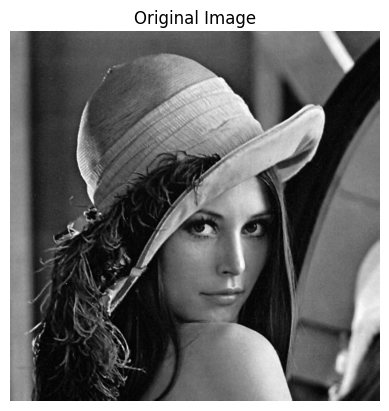

In [11]:
import matplotlib.pyplot as plt

# Convert BGR to RGB and display
def display_image(image, title="Image"):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

display_image(image, "Original Image")


In [12]:
# Get image dimensions
height, width, channels = image.shape
print(f"Image Size: {height}x{width}, Channels: {channels}")


Image Size: 768x768, Channels: 3


In [13]:
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")


Total Pixels: 589824


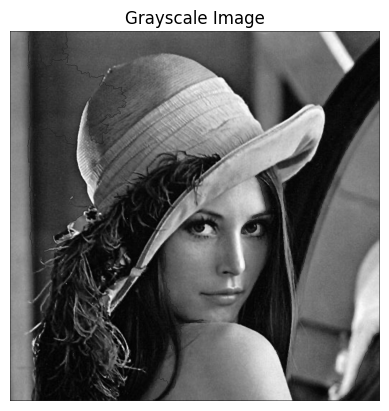

In [26]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Save and display grayscale image
cv2.imwrite("photo_gray.jpg", gray_image)
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


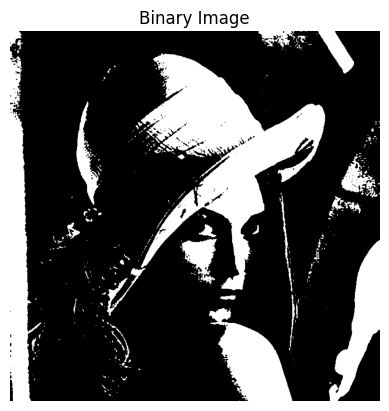

In [15]:
# Convert to binary using thresholding
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Save and display binary image
cv2.imwrite("photo_binary.jpg", binary_image)
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image")
plt.axis("off")
plt.show()


In [16]:
import numpy as np

# Count black pixels (value = 0)
black_pixels = np.sum(binary_image == 0)
print(f"Black Pixels Count: {black_pixels}")


Black Pixels Count: 448769


[[   0.         2198.         1132.         ...  600.
  1220.            0.        ]
 [2144.         3688.46661907 3525.93618774 ... 2000.96076923
  2106.01519463 1266.        ]
 [1000.         3506.93741033 2327.85738395 ... 1313.43290655
  1996.77039241  634.        ]
 ...
 [ 826.         2594.46256477 1916.94183532 ...   63.70243323
   193.38045403   30.        ]
 [1552.         2667.28026274 2644.20649723 ...  177.34147851
   211.10187114  114.        ]
 [   0.         1580.          958.         ...   32.
   132.            0.        ]]


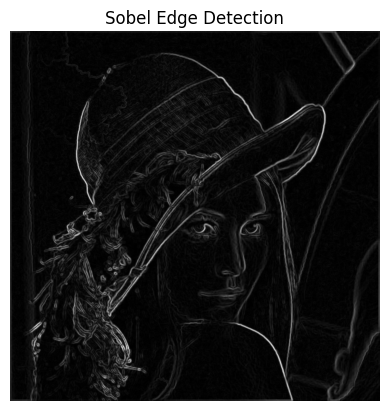

In [28]:
# Sobel Edge Detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Display
print(sobel_edges)
plt.imshow(sobel_edges, cmap="gray")
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()


[[  0 220   0 ...   0   0   0]
 [  0 219   1 ...   2   0   0]
 [  8   5  11 ...   2   0   0]
 ...
 [  2 236  16 ...   3  22   2]
 [154  52 243 ...   0  14   0]
 [  0 154   8 ...   0  14   0]]


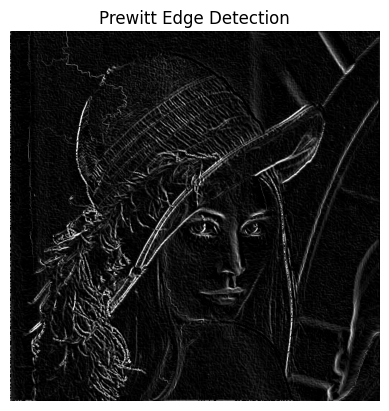

In [27]:
import numpy as np

# Define Prewitt kernels
kernel_x = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernel_y = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

# Apply Prewitt filter
prewitt_x = cv2.filter2D(gray_image, -1, kernel_x)
prewitt_y = cv2.filter2D(gray_image, -1, kernel_y)
prewitt_edges = prewitt_x + prewitt_y

print(prewitt_edges)

# Display
plt.imshow(prewitt_edges, cmap="gray")
plt.title("Prewitt Edge Detection")
plt.axis("off")
plt.show()


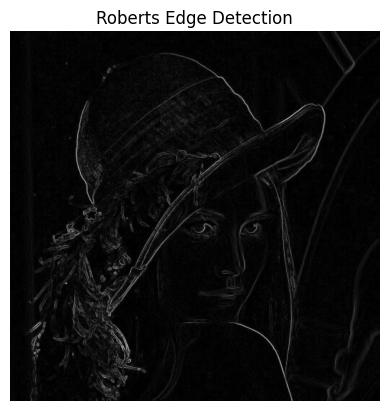

In [19]:
from skimage.filters import roberts

# Apply Roberts Cross filter
roberts_edges = roberts(gray_image)

# Display
plt.imshow(roberts_edges, cmap="gray")
plt.title("Roberts Edge Detection")
plt.axis("off")
plt.show()


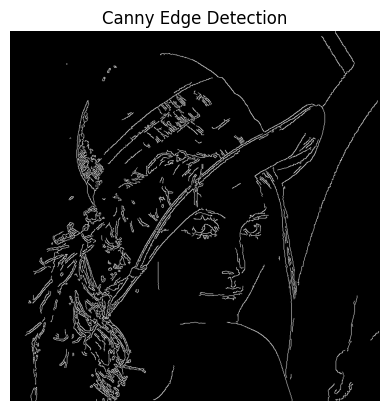

In [20]:
# Apply Canny Edge Detection
canny_edges = cv2.Canny(gray_image, 100, 200)

# Display
plt.imshow(canny_edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


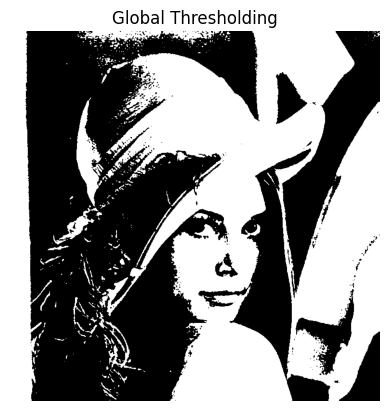

In [21]:
from skimage.filters import threshold_otsu

# Apply Otsu's Thresholding
threshold_value = threshold_otsu(gray_image)
_, global_thresh = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

# Display Global Thresholding
plt.imshow(global_thresh, cmap="gray")
plt.title("Global Thresholding")
plt.axis("off")
plt.show()


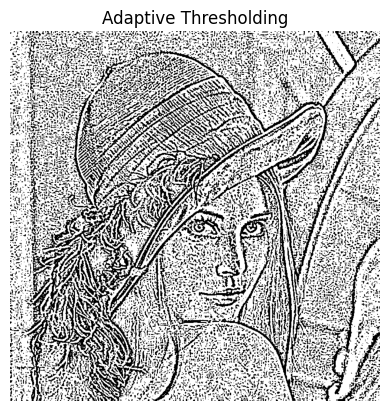

In [22]:
# Apply Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Display Adaptive Thresholding
plt.imshow(adaptive_thresh, cmap="gray")
plt.title("Adaptive Thresholding")
plt.axis("off")
plt.show()


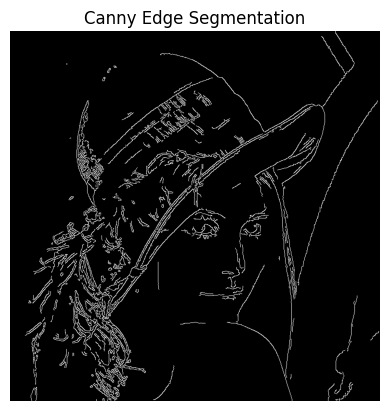

In [23]:
# Display Canny Edge Detection Segmentation
plt.imshow(canny_edges, cmap="gray")
plt.title("Canny Edge Segmentation")
plt.axis("off")
plt.show()


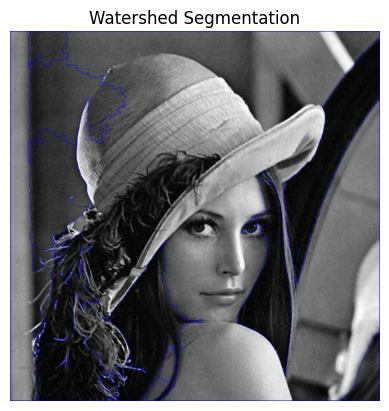

In [24]:
# Convert to grayscale again (in case needed)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Distance Transform
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(binary, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

# Display Watershed Segmentation
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.axis("off")
plt.show()
